# Hands-On NLP — Class 2

<span style="color:magenta">Group members:</span>

* Ying Lai 22305391
* Yingjie Liu 22200660

## Outline

- Embeddings from scratch

- Classifications with embeddings

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from nltk.tokenize import word_tokenize
from sklearn import (
    decomposition,
    ensemble,
    linear_model,
    metrics,
    model_selection,
    multiclass,
    naive_bayes,
    neighbors,
    svm,
    tree,
)
# from sklearn.feature_extraction.text import CountVectorizer
from tqdm.notebook import tqdm

In [2]:
tqdm.pandas()

nltk.download("punkt")

print("sklearn", sklearn.__version__)   # 1.3.2

sns.set_style("darkgrid")
sns.set_context("notebook")

pd.set_option("display.precision", 2)

sklearn 1.4.0


[nltk_data] Downloading package punkt to /Users/yinglai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
%config InlineBackend.figure_format="retina"  # For high DPI display

# %load_ext blackcellmagic

In [4]:
#DATA = Path("data")
DATA = Path("texts")

#TEXT_P = DATA / "texts"
TEXT_P = DATA

CORPORA = [
    "mythology",
    "woodworking",
    "robotics",
    "hsm",
    "health",
    "portuguese",
]

EPS = np.finfo(float).eps

## Getting the data

In [5]:
corpora = {}
stats = []

for corpus in tqdm(CORPORA):
    print(corpus)
    texts = []
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            texts.append(f.read())

    corpora[corpus] = "".join(texts)

    stats.append(
        {
            "corpus": corpus,
            "files_n": len(texts),
            "chars_n": len(corpora[corpus]),
        }
    )

df = pd.DataFrame.from_records(stats, index=["corpus"])
df["text"] = [corpora[corpus] for corpus in corpora]
df

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


,files_n,chars_n,text
corpus,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n..."
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic..."


### Tokenizing

In [6]:
# If your machine is slow, pickeling allows to go faster next time.

tokens_fp = DATA / "tokens.pkl"
try:
    tokens = pd.read_pickle(tokens_fp)
except FileNotFoundError:
    tokens = df.text.progress_map(word_tokenize)
    tokens.to_pickle(tokens_fp)

In [7]:
df["tokens"] = tokens
df["tokens_n"] = df.tokens.map(len)
df["types_n"] = df.tokens.map(set).map(len)
df

,files_n,chars_n,text,tokens,tokens_n,types_n
corpus,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,"[Q, :, Can, anyone, identify, what, Chinese, m...",942611,51243
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390534,32316
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,"[Q, :, How, is, this, torque, value, arrived, ...",1526918,53823
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...","[Q, :, When, and, why, did, people, stopped, u...",1445136,62465
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,"[Q, :, Help, reading, an, eyeglass, prescripti...",1714930,66007
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...","[Q, :, Qual, a, origem, da, expressão, ``, o, ...",907253,60276


## Vectorization

### 🚧 TODO: How to vectorize text?

- Try counting words in the stackoverflow corpus based on a given vocabulary

- Apply reduction techniques to reduce the dimensionality to 2 dimensions (e.g., PCA)

- Plot the 2D vectors

In [8]:
words = (
    "myth,wood,robot,history,science,mathematics,health,portuguese,o".split(",")
)
wc_df = pd.DataFrame(index=df.index)
# for w in words:
#     ...
        

In [9]:
# wc_df

In [10]:

for w in words:
    wc_df[w] = df.tokens.apply(lambda tokens: tokens.count(w))
print(wc_df)

             myth  wood  robot  history  science  mathematics  health  \
corpus                                                                  
mythology     769    55      6      179       21            4      18   
woodworking     5  7535      0       18        9            0      48   
robotics        0    21   4895       23       22           43       3   
hsm            26    14      2      921      846         1578      28   
health         46    10      1      207      114            6    1576   
portuguese      2    11      3       13        3            1       8   

             portuguese      o  
corpus                          
mythology             0     27  
woodworking           0      2  
robotics              0     63  
hsm                   1     25  
health                1      3  
portuguese           41  14589  


In [11]:
# Apply reduction techniques to reduce the dimensionality to 2 dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xs_pca = pca.fit_transform(wc_df)


In [12]:
print(xs_pca)

[[-2172.11807505 -1204.418861  ]
 [-3185.9537627   5969.32416384]
 [-2446.45160229 -2479.24649585]
 [-2214.38228703 -1352.87210068]
 [-2215.38517532 -1297.79394626]
 [12234.29090238   365.00723994]]


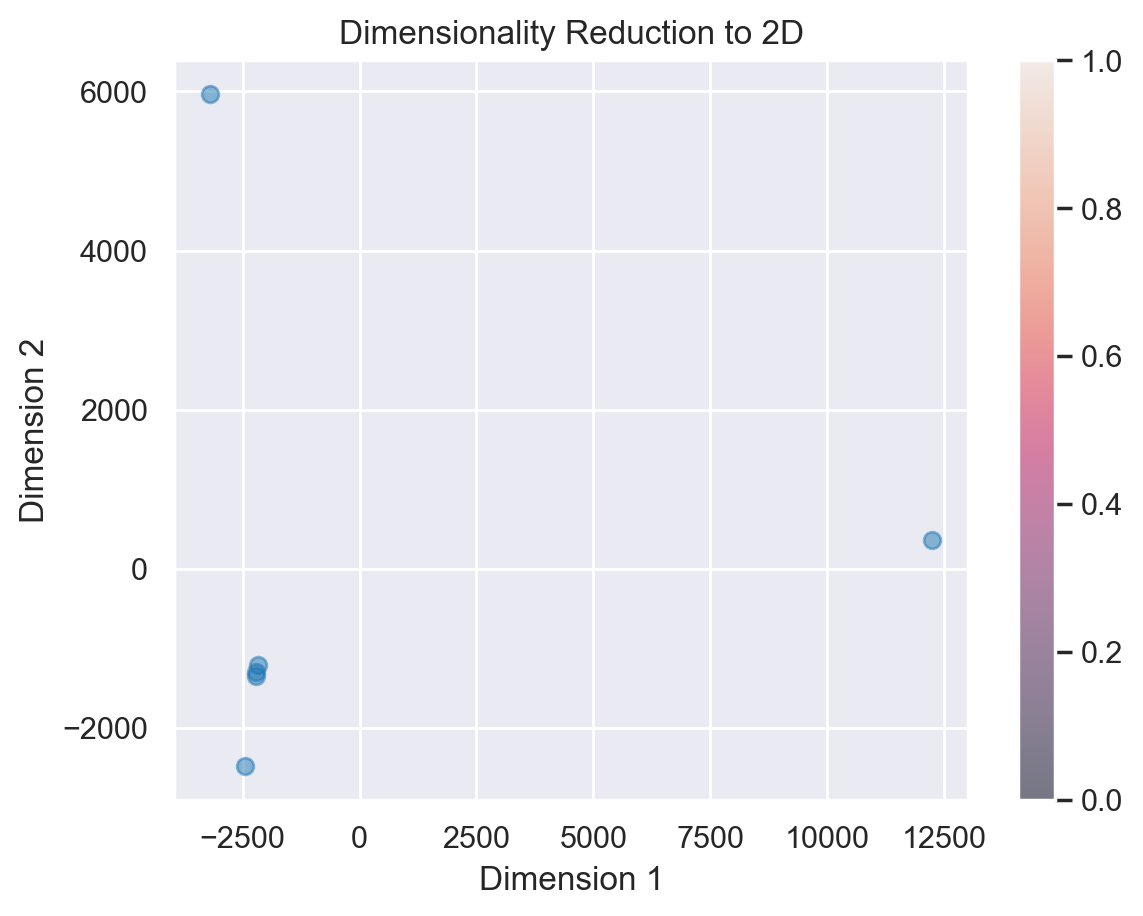

In [13]:
# Plot the 2D vectors

plt.figure()
plt.scatter(xs_pca[:, 0], xs_pca[:, 1], alpha=0.5)
plt.title('Dimensionality Reduction to 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()

#### Bag of words

### 🚧 TODO: Implement another bag of words vectorizer model on the corpus

*   This time using [sklearn's `CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

*   Try first the provided example in the `CountVectorizer` documentation

    Try with and without the n-gram parameter

*   Then try to vectorize the stackoverflow corpus using `vocabulary=words`

#### First with a toy example

In [14]:
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

With the whole vocabulary

In [15]:
# vectorizer = feature_extraction...
# xs = vectorizer...

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
xs = vectorizer.fit_transform(corpus)
print(f'Try without n-gram parameter')
print(vectorizer.get_feature_names_out())
print(xs.toarray())
print(f'\n')
# vectorizer_2g = ...
# x2gs = ...


# Try with n-gram parameter
vectorizer_2g = CountVectorizer(ngram_range=(2,2))
x2gs = vectorizer_2g.fit_transform(corpus)
print(f'Try with n-gram parameter')
print(vectorizer_2g.get_feature_names_out())
print(x2gs.toarray())
print(f'\n')

# Try to vectorize the stackoverflow corpus using vocabulary=words

vectorizer_4g = CountVectorizer(vocabulary=words)
x4gs = vectorizer_4g.fit_transform(corpus)
print(f'Try to vectorize the stackoverflow corpus using vocabulary=words')
print(vectorizer_4g.get_feature_names_out())
print(x2gs.toarray())

Try without n-gram parameter
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


Try with n-gram parameter
['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third one'
 'this document' 'this is' 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


Try to vectorize the stackoverflow corpus using vocabulary=words
['myth' 'wood' 'robot' 'history' 'science' 'mathematics' 'health'
 'portuguese' 'o']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


In [16]:
cv_df = pd.DataFrame(xs.toarray(), columns=vectorizer.get_feature_names_out())
cv_df.insert(0, "Document", corpus)
cv_df

,Document,and,document,first,is,one,second,the,third,this
0,This is the first document.,0,1,1,1,0,0,1,0,1
1,This document is the second document.,0,2,0,1,0,1,1,0,1
2,And this is the third one.,1,0,0,1,1,0,1,1,1
3,Is this the first document?,0,1,1,1,0,0,1,0,1


With a subset of the vocabulary

In [17]:
vocabulary = ["and", "document", "first"]
# vectorizer = ...
vectorizer_sub = CountVectorizer(vocabulary=vocabulary)
sub = vectorizer_sub.fit_transform(corpus)
print(vectorizer_sub.get_feature_names_out())
print(sub.toarray())

['and' 'document' 'first']
[[0 1 1]
 [0 2 0]
 [1 0 0]
 [0 1 1]]


#### Reprocess the stackoverflow corpora with `CountVectorizer`

In [18]:
# vectorizer = ...
vectorizer = CountVectorizer()
xs = vectorizer.fit_transform(corpus)

### 🚧 TODO: Why is this different? 

- Try to explain

- Give a simple example with the toy corpus below (with the same vocabulary)

In [19]:
test_text = (
    "myth wood robot history science mathematics health portuguese o "
    "myth wood robot history science mathematics health portuguese o"
)

# freqs = ...


# test_wc_df = ...

In [20]:
# test_xs = vectorizer...

# test_cv_df = ...


### 🚧 TODO: Is this difference important?

• Visualize the PCAs of both models

In [21]:
# Visualize the PCAs of both model

-----------

### Now let's hold the corpus as individual documents

In [22]:
data = []

for i, corpus in enumerate(tqdm(CORPORA)):
    print(corpus)
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            text = f.read()
        data.append(
            {
                "id": fp.stem,
                "text": text,
                "category": corpus,
                "cat_id": i,
            }
        )

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


In [23]:
doc_df = pd.DataFrame.from_records(data).set_index("id")
doc_df

,text,category,cat_id
id,,,
mythology.stackexchange_0000001634,Q:\n\nCan anyone identify what Chinese mytholo...,mythology,0
mythology.stackexchange_0000002329,Q:\n\nHave runes ever been used to bring someo...,mythology,0
mythology.stackexchange_0000001146,Q:\n\nDifferences in the Greek and Roman portr...,mythology,0
mythology.stackexchange_0000004770,"Q:\n\nWhich cultures have the concept of a ""tr...",mythology,0
mythology.stackexchange_0000000516,Q:\n\nWhy did Arawn choose Pwyll to fight Hafg...,mythology,0
...,...,...,...
portuguese.stackexchange_0000001017,"Q:\n\n""pois não"" has an affirmative connotatio...",portuguese,5
portuguese.stackexchange_0000004609,"Q:\n\nPor que ""Teiú"" tem acento?\n\nMonossílab...",portuguese,5
portuguese.stackexchange_0000000484,"Q:\n\nRegional usage of ""guitarra"" and ""violão...",portuguese,5


#### 🚧 TODO: Plot (bar) the number of documents per category

In [24]:
# doc_df...

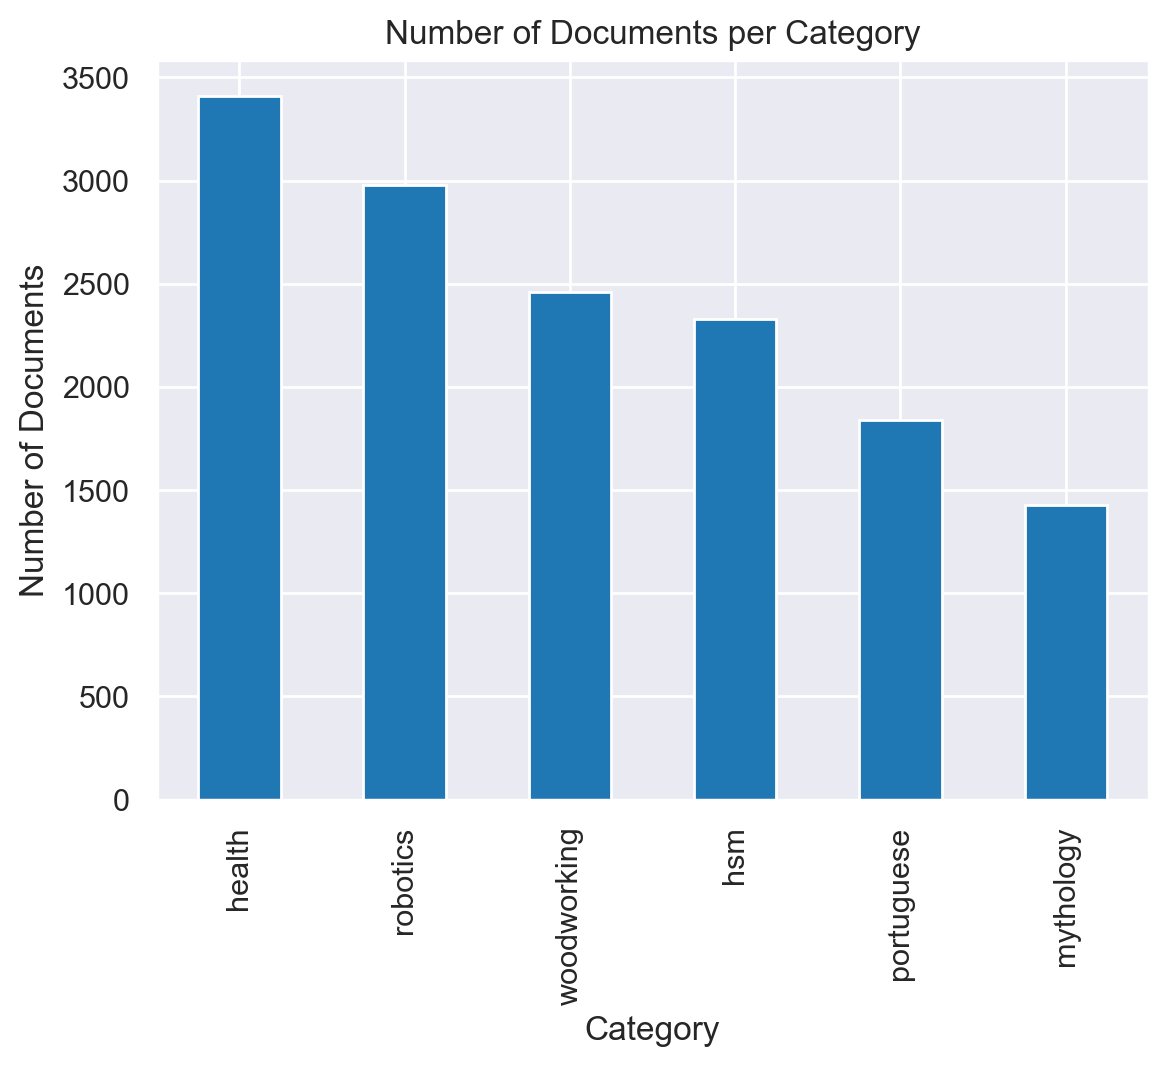

In [25]:
# count number of documents per category
category_counts = doc_df['category'].value_counts()



# Plot bar
plt.figure()
category_counts.plot(kind='bar')
plt.title('Number of Documents per Category')
plt.xlabel('Category')
plt.ylabel('Number of Documents')
plt.show()

#### 🚧 TODO: Boxplot the number of tokens per document

* With and without outliers

* Shortly explain the different values presented in a boxplot ([Wikipedia](https://en.wikipedia.org/wiki/Box_plot))

* Are the texts of signifcantly different length? Argue shortly.

In [26]:
# Careful: slow!

# doc_df["tokens_n"] ...

In [27]:
# 对每个文档进行分词
tokens_list = []
token_counts = []
for text in doc_df['text']:
    tokens = word_tokenize(text)
    tokens_list.append(tokens)
    token_counts.append(len(tokens))


doc_df['tokens'] = tokens_list
doc_df['token_counts'] = token_counts


doc_df.head()

,text,category,cat_id,tokens,token_counts
id,,,,,
mythology.stackexchange_0000001634,Q:\n\nCan anyone identify what Chinese mytholo...,mythology,0,"[Q, :, Can, anyone, identify, what, Chinese, m...",149
mythology.stackexchange_0000002329,Q:\n\nHave runes ever been used to bring someo...,mythology,0,"[Q, :, Have, runes, ever, been, used, to, brin...",479
mythology.stackexchange_0000001146,Q:\n\nDifferences in the Greek and Roman portr...,mythology,0,"[Q, :, Differences, in, the, Greek, and, Roman...",634
mythology.stackexchange_0000004770,"Q:\n\nWhich cultures have the concept of a ""tr...",mythology,0,"[Q, :, Which, cultures, have, the, concept, of...",761
mythology.stackexchange_0000000516,Q:\n\nWhy did Arawn choose Pwyll to fight Hafg...,mythology,0,"[Q, :, Why, did, Arawn, choose, Pwyll, to, fig...",1213


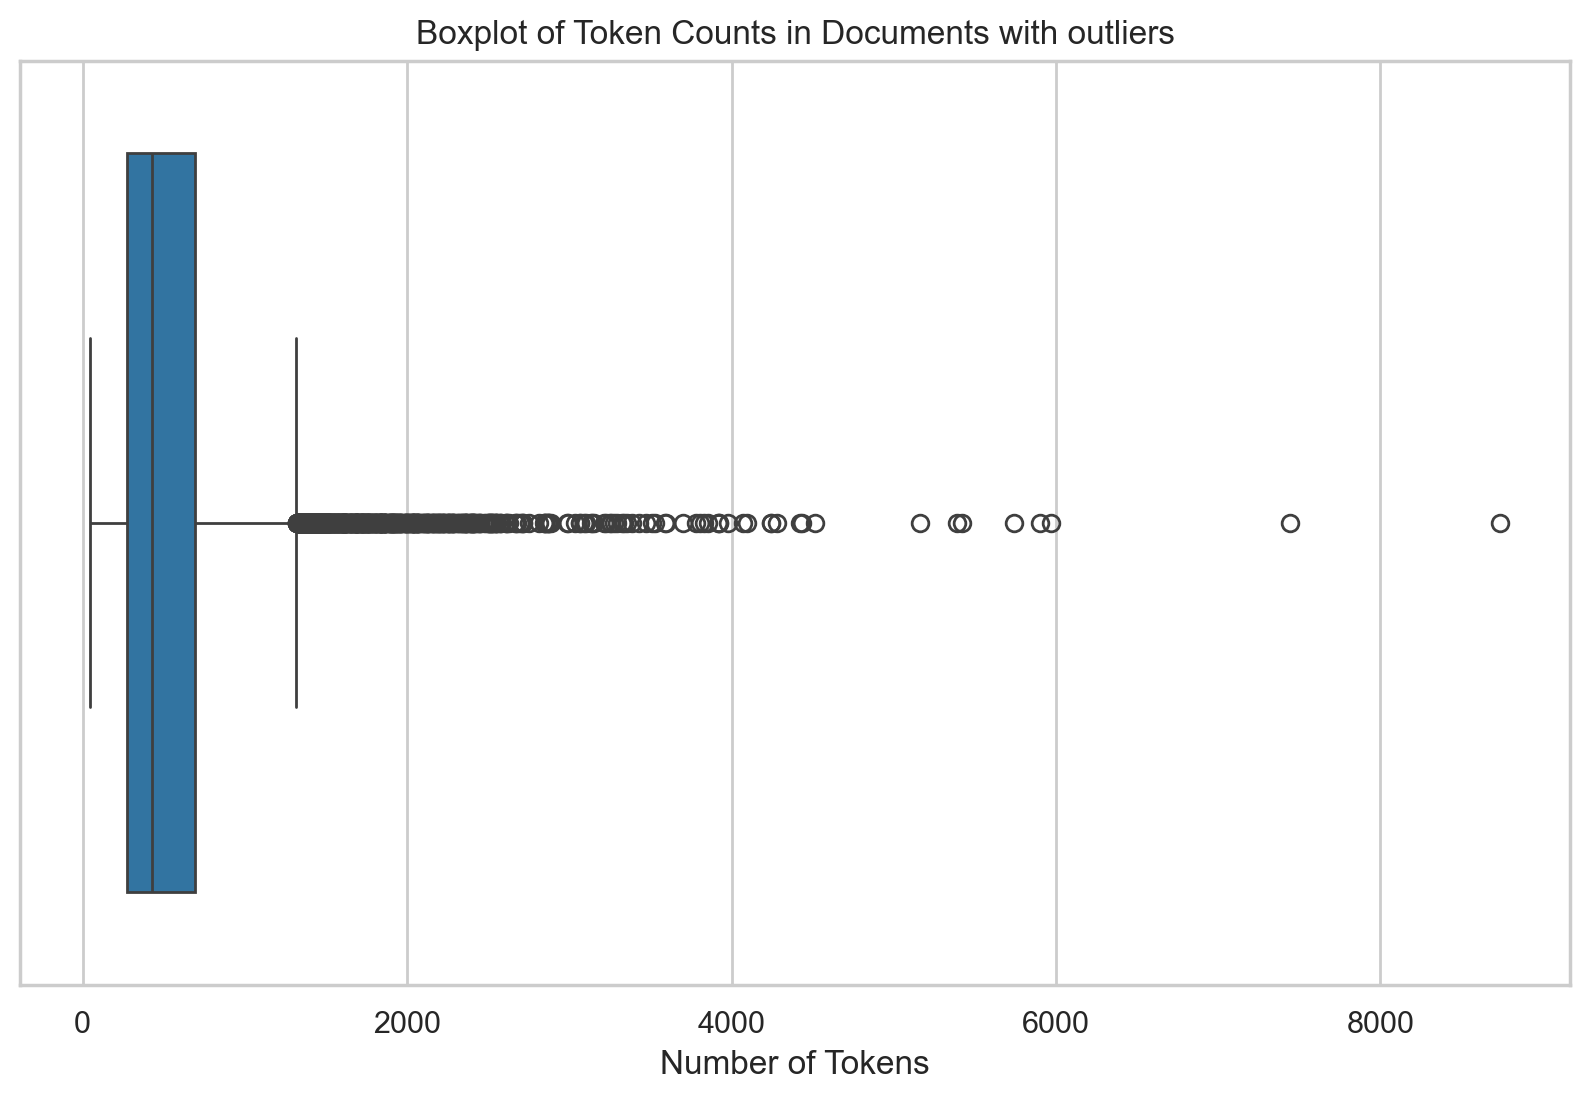

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x=doc_df['token_counts'])


plt.title('Boxplot of Token Counts in Documents with outliers')
plt.xlabel('Number of Tokens')


plt.show()

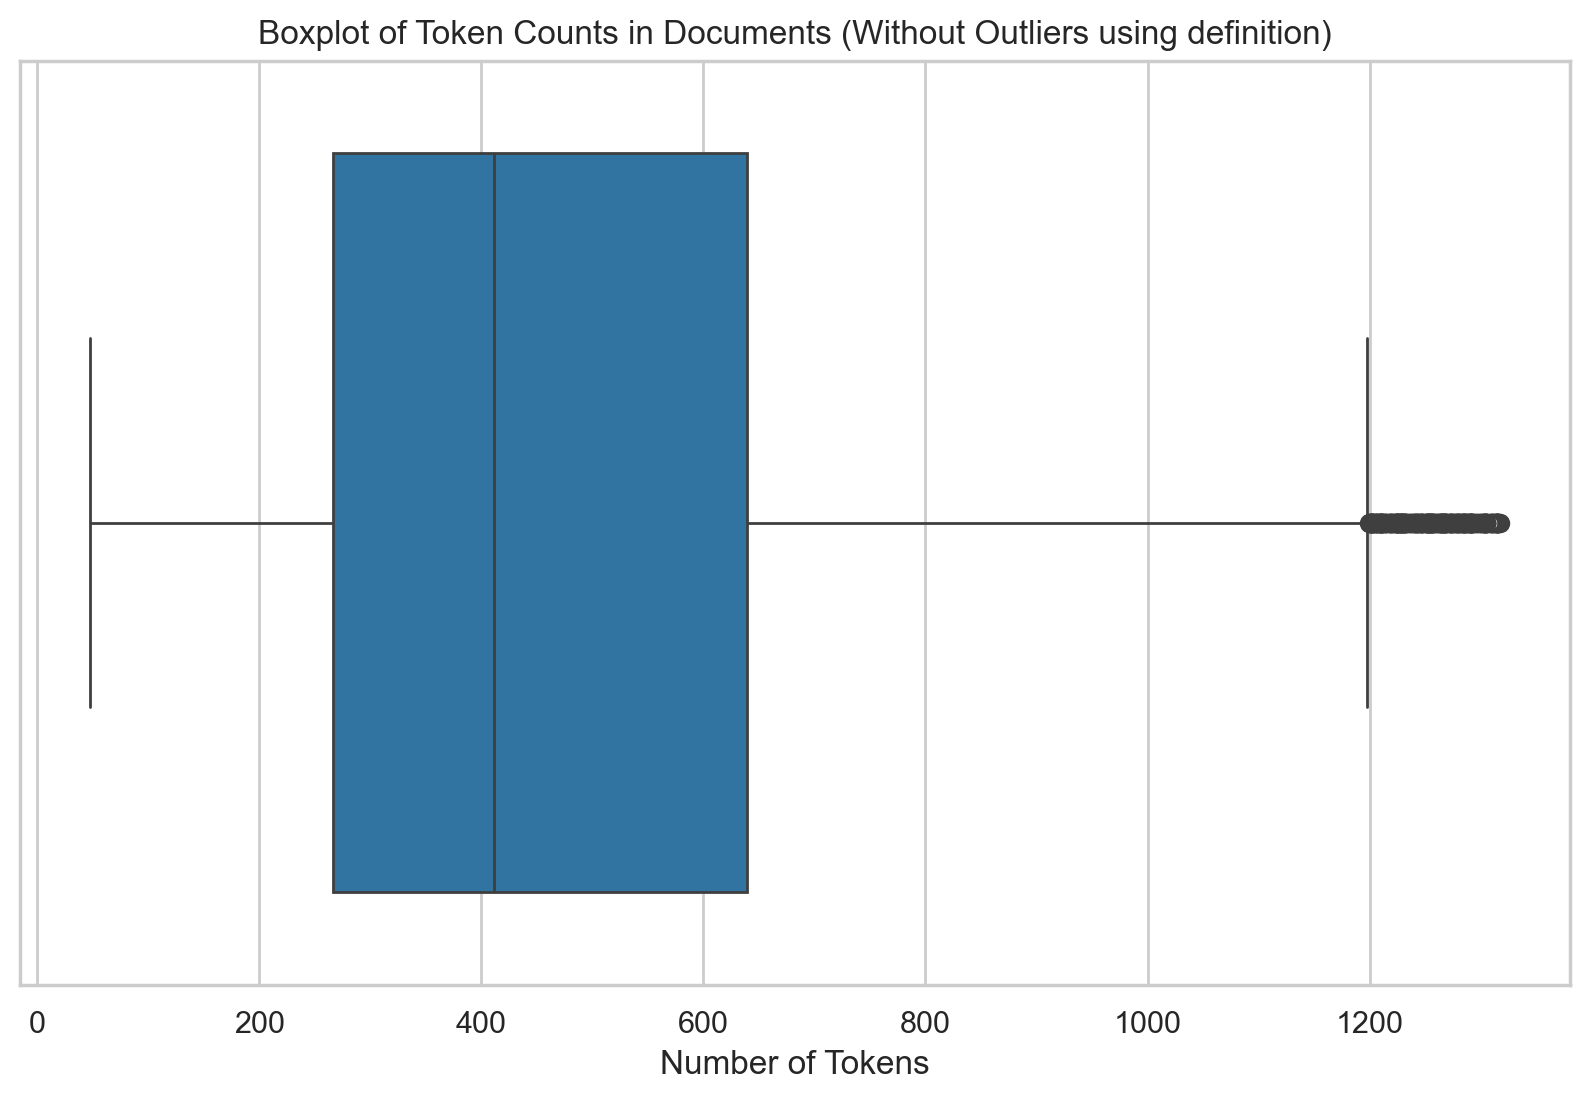

In [61]:

import matplotlib.pyplot as plt
import seaborn as sns

# We try to use the definition of outliers

Q1 = doc_df['token_counts'].quantile(0.25)
Q3 = doc_df['token_counts'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_doc_df = doc_df[(doc_df['token_counts'] >= lower_bound) & (doc_df['token_counts'] <= upper_bound)]


plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_doc_df['token_counts'])
plt.title('Boxplot of Token Counts in Documents (Without Outliers using definition)')
plt.xlabel('Number of Tokens')
plt.show()

**Somehow, the outliers are still showed in the boxplot ?**


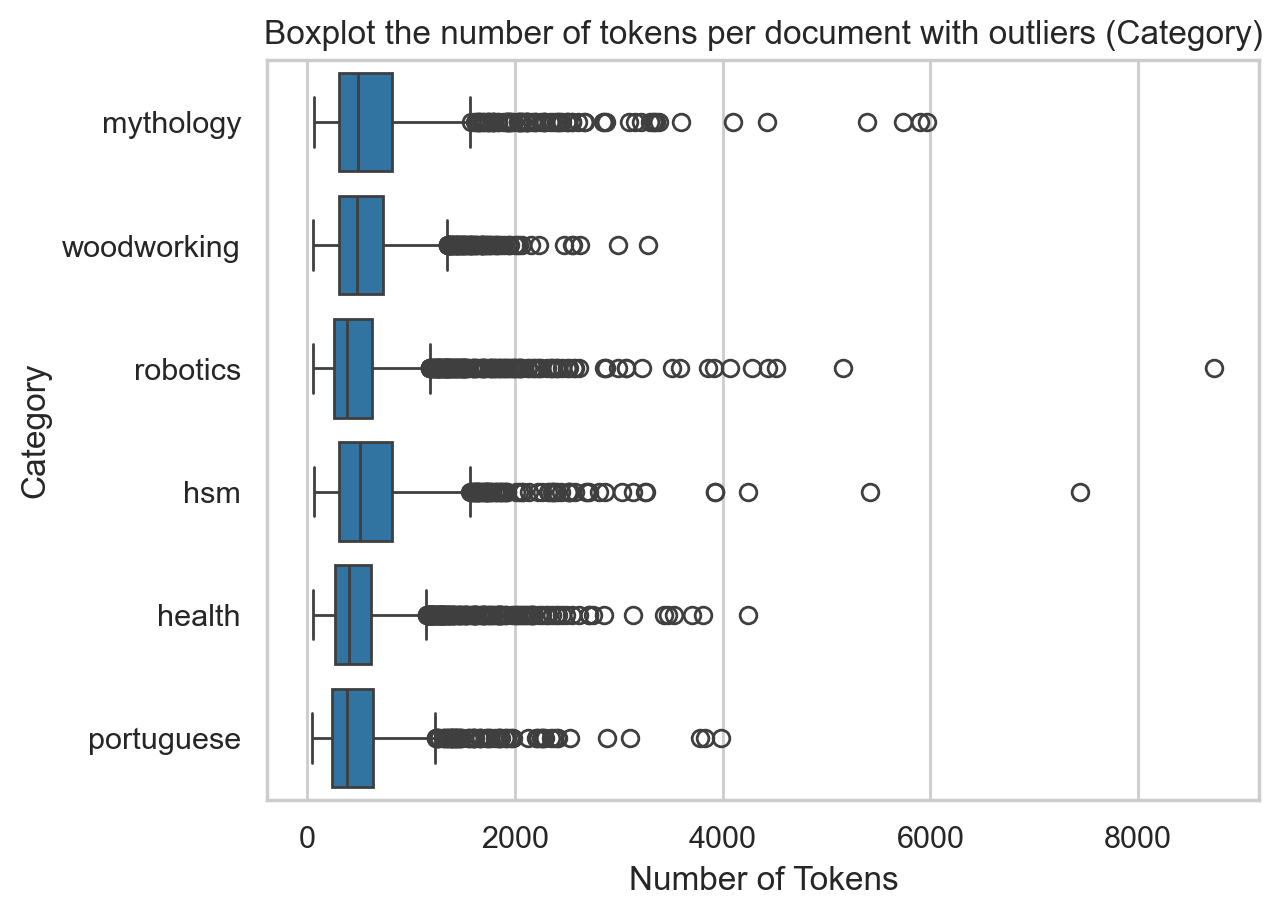

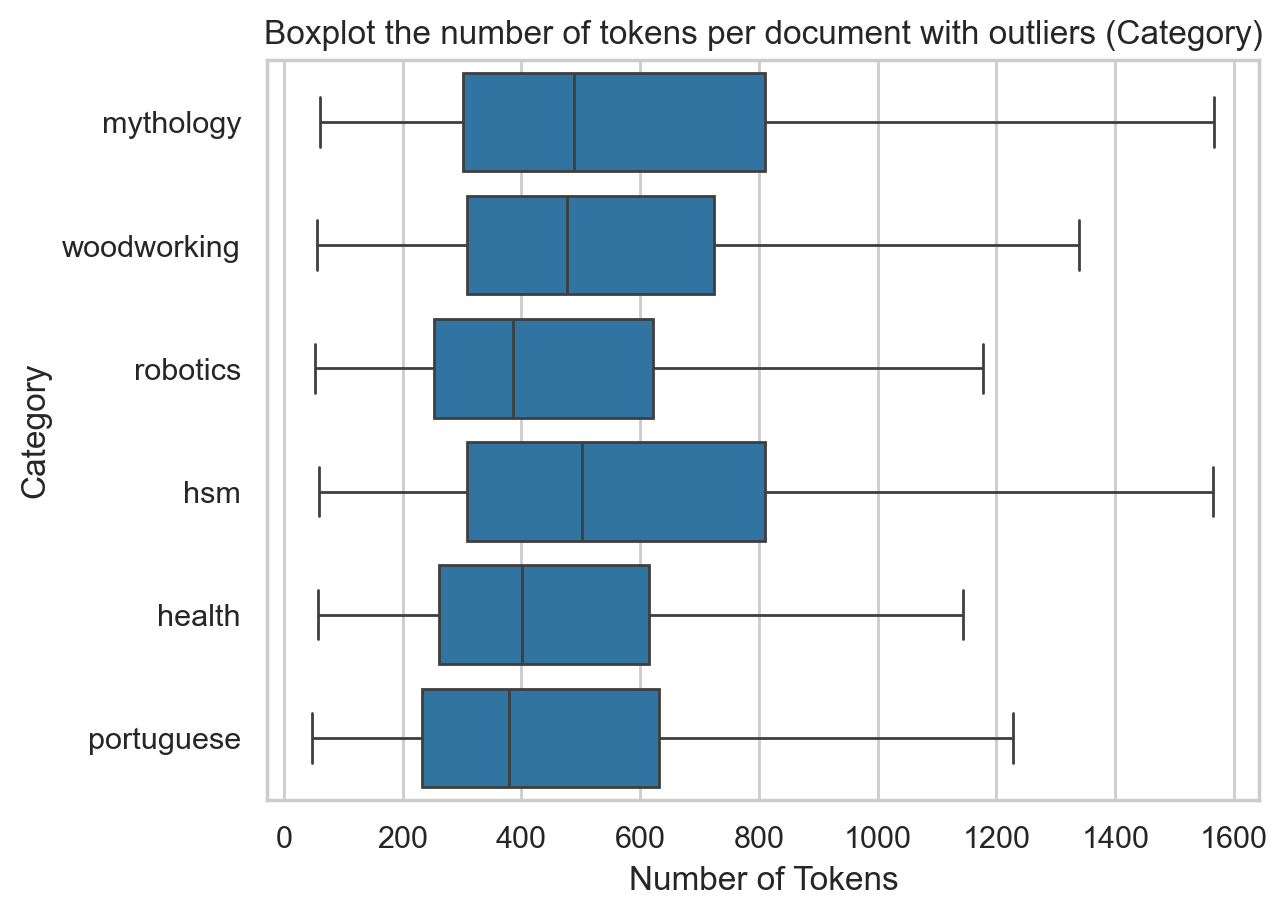

In [58]:
# We also show boxplot of the number of tokens in each category

# count the number of tokens
doc_df['num_tokens'] = doc_df['text'].apply(nltk.word_tokenize).apply(len)

# Boxplot

# With outliers
plt.figure()
sns.boxplot(data=doc_df, x='num_tokens', y='category', showfliers=True)
plt.title('Boxplot the number of tokens per document with outliers (Category)')
plt.xlabel('Number of Tokens')
plt.ylabel('Category')
plt.show()


# Without outliers
plt.figure()
sns.boxplot(data=doc_df, x='num_tokens', y='category', showfliers=False)
plt.title('Boxplot the number of tokens per document with outliers (Category)')
plt.xlabel('Number of Tokens')
plt.ylabel('Category')
plt.show()


**Shortly explain the different values presented in a boxplot**

Boxplot invloves outliers which are plotted as dots. The center line in the box shows the median for the data, and the bottom and top of the box show the 25th and 75th quantiles, or percentiles. The lines that extend from the box are called whiskers. The whiskers represent the expected variation of the data.  Depending on the data, the ends of the box are either maximum or minimum data values include outliers or 1.5*IQR (The interquartile range (IQR) is the range of values that resides in the middle of the scores).

**Are the texts of signifcantly different length? Argue shortly.**


Yes, text length is significantly different. From the box plot, it is evident that the lengths of texts in different categories are concentrated between 200 and 800. However, there are numerous outliers with lengths exceeding 2000, and some even surpassing 6000.

**修改：** 不重要！！

#### 🚧 TODO: How to find the crazy long robotics text?

*   Find the index of the longest text

*   Show the content

*   Explain why this text is so long (what does it contain?)

In [30]:
# longests_df = doc_df[...

In [32]:
# Find the index of the longest text
# From boxplot, we know that the longest text is included in 'robotics' category



longest_index = doc_df[doc_df['category'] == 'robotics']['num_tokens'].idxmax()

# Show the content 
longest_text = doc_df.loc[longest_index, 'text']
print(f'The longest text is {longest_text}')

The longest text is Q:

6DOF Kinematics moveo

I asked on stackoverflow for the DH-Parameter for my robotic arm (moveo bcn3d).
I also copied the arduino code of Skyentific (YouTuber). Modified it to match my settings but i still does not work. Can someone please help me??? I am getting depressed if this keeps going like that.
In the home position, all joints have angle 0.
If I tell the forward kinematic that I want the 3rd joint and the 5th joint rotated 90 degrees, the values should be: (224, 0, 280) {x, y, z} should come out + some euler angles (can be ignored for now).
But I don't understand why these values come out, because the r and d values of the DH matrix are correct(https://stackoverflow.com/questions/67159164/denavit-hartenberg-6dof-moveo-inverse-kinematic-robot-arm?noredirect=1#comment118726837_67159164)
Output of the Arduino:\
inverse:
0.00
0.00
-0.00
-180.00
180.00
-180.00
forward:
-224.00
0.00
280.00
45.00
180.00
45.00
In this example you can see that the inverse kinemat

**Explain why this text is so long (what does it contain?)**

This text contains English sentences, URLs, and code. During the vectorization process, it is highly probable that each letter or number in the code will be treated separately

### Vectorizing again

#### 🚧 TODO: See how many features we get if we don't restrict their number

* Use again the `CountVectorizer` to vectorize the stackoverflow corpus

  * But use the whole vocabulary of the documents this time (**without** `vocabulary=words`)

  * Tell how many features are obtained

* Then limit the vocabulary to the 5000 most frequent words

* Apply and plot dimensionality reduction to 2 dimensions as prevously 
  (only on the limited vocabulary)

We want something like this:

```python
xs ~ doc_df.text
ys ~ doc_df.cat_id
```

In [33]:
ys = doc_df.cat_id.values

In [ ]:
# unconstrained_cv = CountVectorizer()
# xs = ...

In [34]:
# Use again the CountVectorizer to vectorize the stackoverflow corpus

# use the whole vocabulary of the documents
unconstrained_cv = CountVectorizer()
xs = unconstrained_cv.fit_transform(doc_df['text'])

# Tell how many features are obtained
print(f"Number of features without restricting the vocabulary: {xs.shape[1]}")

Number of features without restricting the vocabulary: 153122


In [ ]:
# cv = CountVectorizer(max_features=5000)
# xs = ...

In [35]:
# limit the vocabulary to the 5000 most frequent words
cv = CountVectorizer(max_features=5000)
xs_limit = cv.fit_transform(doc_df['text'])


In [ ]:
# pca = ...


In [ ]:
# Apply and plot dimensionality reduction to 2 dimensions as prevously

# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# xs_pca = pca.fit_transform(xs_limit)


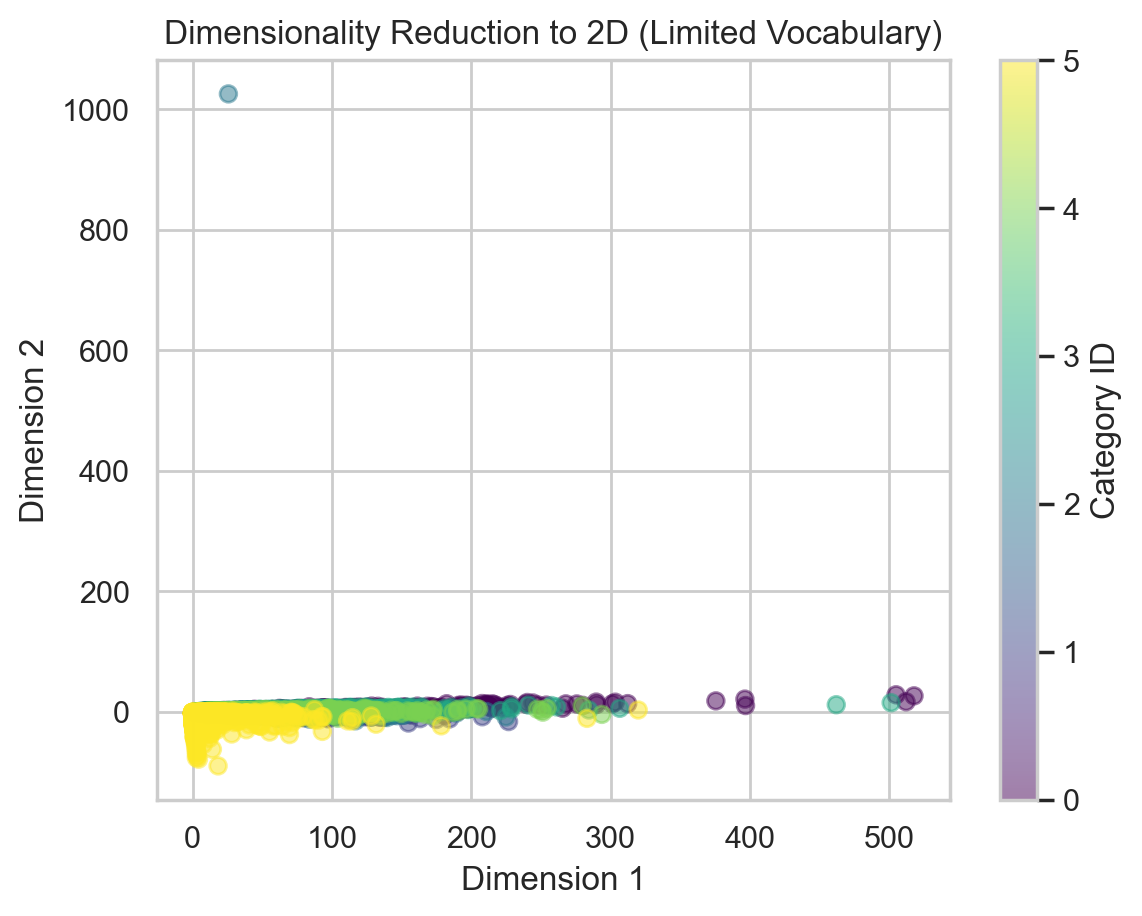

In [36]:
# Problem: PCA only support sparse inputs with the "arpack" solver, while "auto" was passed. 
# See TruncatedSVD for a possible alternative

# Use truncated SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
xs_svd = svd.fit_transform(xs_limit)

# Plot the reduced features
plt.figure()
plt.scatter(xs_svd[:, 0], xs_svd[:, 1], c=doc_df['cat_id'], cmap='viridis', alpha=0.5)
plt.title('Dimensionality Reduction to 2D (Limited Vocabulary)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Category ID')
plt.show()


#### 🚧 TODO: Find that outlier!

* Use pandas to find the document corresponding to the outlier

* Print the correspoding text
  
* Tell what it contains (if you could figure it out)

* Remove the corresping raw from the dataframe and redo the dimensional reduction (and plot)

In [37]:
# Use pandas to find the document corresponding to the outlier

# use zscore to delete outliers
from scipy.stats import zscore

z_scores = zscore(doc_df.select_dtypes(include=['float64', 'int64']))

# Define a threshold for Z-scores
threshold = 3  # standard deviations
outlier_indices = (abs(z_scores) > threshold).any(axis=1)


In [38]:
# Print the text of outliers

# Tell what it contains (if you could figure it out)
print(f"Outlier text (index {outlier_indices}):\n{doc_df.loc[outlier_indices, 'text']}")

Outlier text (index id
mythology.stackexchange_0000001634     False
mythology.stackexchange_0000002329     False
mythology.stackexchange_0000001146     False
mythology.stackexchange_0000004770     False
mythology.stackexchange_0000000516     False
                                       ...  
portuguese.stackexchange_0000001017     True
portuguese.stackexchange_0000004609    False
portuguese.stackexchange_0000000484    False
portuguese.stackexchange_0000003833    False
portuguese.stackexchange_0000000490    False
Length: 14451, dtype: bool):
id
mythology.stackexchange_0000005687     Q:\n\nWho is Thulis of Egypt?\n\nKersey Graves...
mythology.stackexchange_0000002103     Q:\n\nDo legends originate from history?\n\nTh...
mythology.stackexchange_0000001740     Q:\n\nIs it Lucifer or Venus?\n\nWhich deity, ...
mythology.stackexchange_0000007654     Q:\n\nSignificance of Enoch's age in the Hebre...
mythology.stackexchange_0000003208     Q:\n\nIs there a source for Māui pushing up th...
     

In [39]:
# Remove outliers from the DataFrame
doc_df_without_outliers = doc_df[~outlier_indices]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(doc_df_without_outliers)

DataFrame without outliers:
                                                                                  text  \
id                                                                                       
mythology.stackexchange_0000001634   Q:\n\nCan anyone identify what Chinese mytholo...   
mythology.stackexchange_0000002329   Q:\n\nHave runes ever been used to bring someo...   
mythology.stackexchange_0000001146   Q:\n\nDifferences in the Greek and Roman portr...   
mythology.stackexchange_0000004770   Q:\n\nWhich cultures have the concept of a "tr...   
mythology.stackexchange_0000000516   Q:\n\nWhy did Arawn choose Pwyll to fight Hafg...   
...                                                                                ...   
portuguese.stackexchange_0000006022  Q:\n\nOrigem da expressão "de mala e cuia"\n\n...   
portuguese.stackexchange_0000004609  Q:\n\nPor que "Teiú" tem acento?\n\nMonossílab...   
portuguese.stackexchange_0000000484  Q:\n\nRegional usage of "guitarra" 

In [40]:
# calculate the number of tokens for each document
# doc_df_without_outliers['num_tokens'] = doc_df_without_outliers['text'].apply(nltk.word_tokenize).apply(len)


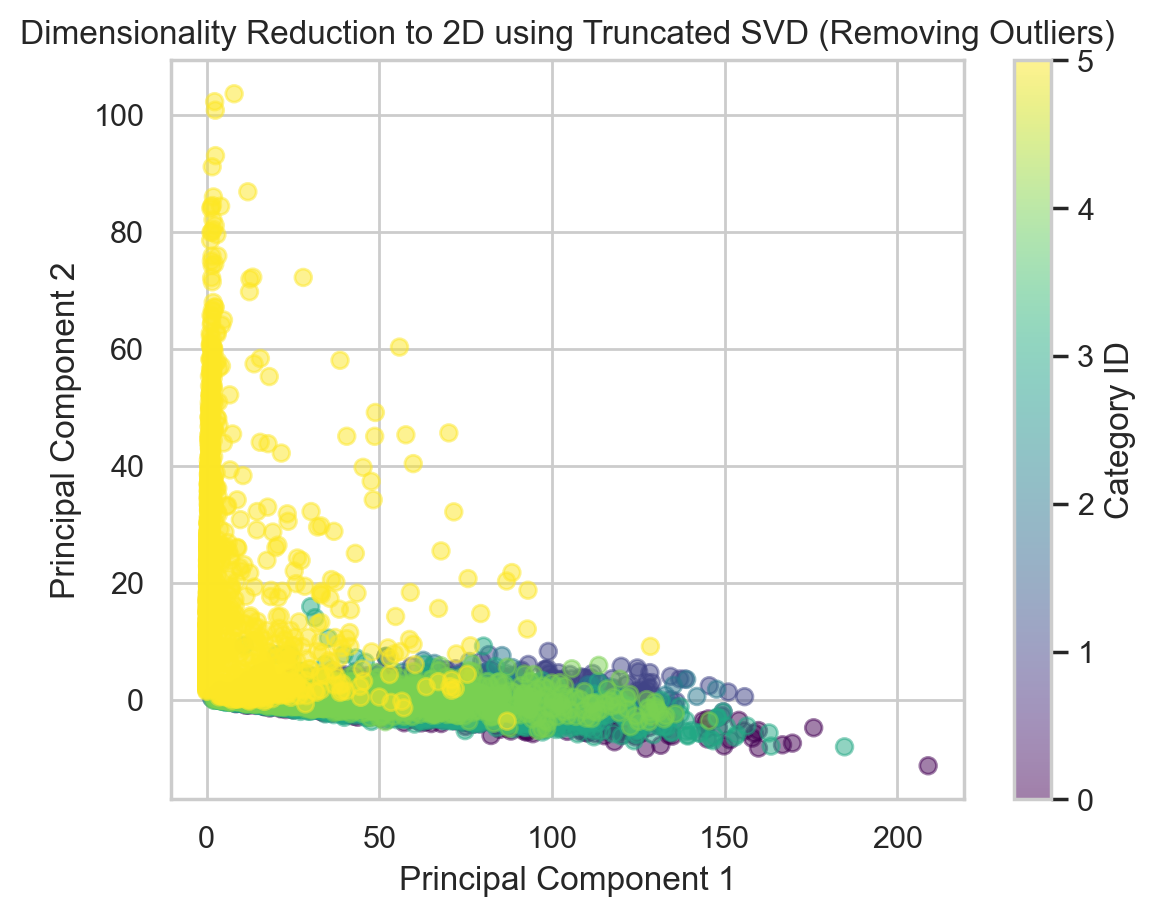

In [41]:
# Redo the dimensional reduction (and plot)

new_cv = CountVectorizer()
new_xs = new_cv.fit_transform(doc_df_without_outliers['text'])

# use truncated svd
svd = TruncatedSVD(n_components=2)
new_xs_svd = svd.fit_transform(new_xs)


# Plot the reduced features using Truncated SVD
plt.figure()
plt.scatter(new_xs_svd[:, 0], new_xs_svd[:, 1], c=doc_df_without_outliers['cat_id'], cmap='viridis', alpha=0.5)
plt.title('Dimensionality Reduction to 2D using Truncated SVD (Removing Outliers)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Category ID')
plt.show()

#### 🚧 TODO: The reason for this outlier is...

*   Give a short explanation

*   Remove the outlier from the dataframe 

*   Redo the dimensional reduction

*   Plot the 2D vectors and color them by category

**Explanation**

So, in data analysis, outliers can really mess with the results of stuff like Truncated SVD, which is a way to shrink down data to make it easier to work with. Think of outliers as the oddballs in your data - they could be just noise, really weird points, or super extreme values. When you're dealing with text data, an outlier could be a document that's way too long or short, or just uses language that's totally different from the rest. Getting rid of these outliers helps to make sure that your analysis really reflects what's going on with most of your data. This way, you get a clearer picture and more trustworthy groupings or categories in your results.

## Train models to predict text subjects

### Split the data in training and test sets

In [42]:
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, test_size=0.3, random_state=0, shuffle=True
)
print(train_xs.shape)
print(test_xs.shape)

(10115, 153122)
(4336, 153122)


### 🚧 TODO: Apply different algorithms to try predicting the category

* E.g., Logistic Regression, Multinomial Naive Bayes, Decision Tree Classifier, Random Forest, Support Vector Classifer.

* You could investigate [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html), which implements linear classifiers (e.g, SVM, logistic regression) with SGD training (faster).

* Present a table with the results of the different algorithms (e.g., accuracy, precision, recall, f1-score) and their execution time

* (Optional) Analyse 1 algorythm in detail (e.g., Logistic Regression)

  *   Try different parameters (possibly with a grid search)

  *   Present the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

  *   Present the confusion matrix of the best model

In [43]:
import time
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Model
lr_start_time = time.time()
lr_model = LogisticRegression(max_iter=1000, random_state=0)
lr_model.fit(train_xs, train_ys)
lr_pred = lr_model.predict(test_xs)
# Time
lr_lasted_time = time.time() - lr_start_time

# Accurary, precision, recall, F1-score
lr_accuracy = metrics.accuracy_score(test_ys, lr_pred)
lr_precision = metrics.precision_score(test_ys, lr_pred, average='weighted')
lr_recall = metrics.recall_score(test_ys, lr_pred, average='weighted')
lr_f1 = metrics.f1_score(test_ys, lr_pred, average='weighted')

# Print
print(f'Using Logistic Regression: \n Time is {lr_lasted_time:.5f},\n Accuracy is {lr_accuracy:.5f},\n Precision is {lr_precision:.5f},\n Recall is {lr_recall:.5f},\n F1-score is {lr_f1:.5f}')

Using Logistic Regression: 
 Time is 13.92086,
 Accuracy is 0.98178,
 Precision is 0.98184,
 Recall is 0.98178,
 F1-score is 0.98180


In [44]:
# Or use the classification_report
print(metrics.classification_report(test_ys, lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       420
           1       0.98      0.99      0.98       692
           2       0.99      0.98      0.98       927
           3       0.97      0.98      0.97       705
           4       0.98      0.99      0.98      1032
           5       1.00      0.99      0.99       560

    accuracy                           0.98      4336
   macro avg       0.98      0.98      0.98      4336
weighted avg       0.98      0.98      0.98      4336



In [45]:
# Multinomial Naive bayes
from sklearn.naive_bayes import MultinomialNB

# Model
nb_start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(train_xs, train_ys)
nb_pred = nb_model.predict(test_xs)
# Time
nb_lasted_time = time.time() - nb_start_time

# Accurary, precision, recall, F1-score
nb_accuracy = metrics.accuracy_score(test_ys, nb_pred)
nb_precision = metrics.precision_score(test_ys, nb_pred, average='weighted')
nb_recall = metrics.recall_score(test_ys, nb_pred, average='weighted')
nb_f1 = metrics.f1_score(test_ys, nb_pred, average='weighted')

# Print
print(f'Using Multinomial Naive bayes: \n Time is {nb_lasted_time:.5f},\n Accuracy is {nb_accuracy:.5f},\n Precision is {nb_precision:.5f},\n Recall is {nb_recall:.5f},\n F1-score is {nb_f1:.5f}')

Using Multinomial Naive bayes: 
 Time is 0.04061,
 Accuracy is 0.97717,
 Precision is 0.97768,
 Recall is 0.97717,
 F1-score is 0.97712


In [46]:
# Or use the classification_report
print(metrics.classification_report(test_ys, nb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       420
           1       0.96      1.00      0.98       692
           2       0.99      0.97      0.98       927
           3       0.96      0.98      0.97       705
           4       0.99      0.99      0.99      1032
           5       1.00      0.93      0.96       560

    accuracy                           0.98      4336
   macro avg       0.98      0.98      0.98      4336
weighted avg       0.98      0.98      0.98      4336



In [47]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Model
dt_start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(train_xs, train_ys)
dt_pred = dt_model.predict(test_xs)
# Time
dt_lasted_time = time.time() - dt_start_time

# Accurary, precision, recall, F1-score
dt_accuracy = metrics.accuracy_score(test_ys, dt_pred)
dt_precision = metrics.precision_score(test_ys, dt_pred, average='weighted')
dt_recall = metrics.recall_score(test_ys, dt_pred, average='weighted')
dt_f1 = metrics.f1_score(test_ys, dt_pred, average='weighted')

# Print
print(f'Using Decision Tree Classifier: \n Time is {dt_lasted_time:.5f},\n Accuracy is {dt_accuracy:.5f},\n Precision is {dt_precision:.5f},\n Recall is {dt_recall:.5f},\n F1-score is {dt_f1:.5f}')

Using Decision Tree Classifier: 
 Time is 3.71884,
 Accuracy is 0.88215,
 Precision is 0.88239,
 Recall is 0.88215,
 F1-score is 0.88194


In [48]:
# Or use the classification_report
print(metrics.classification_report(test_ys, dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       420
           1       0.91      0.91      0.91       692
           2       0.91      0.89      0.90       927
           3       0.83      0.83      0.83       705
           4       0.85      0.89      0.87      1032
           5       0.97      0.97      0.97       560

    accuracy                           0.88      4336
   macro avg       0.88      0.88      0.88      4336
weighted avg       0.88      0.88      0.88      4336



In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Model
rf_start_time = time.time()
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(train_xs, train_ys)
rf_pred = rf_model.predict(test_xs)
# Time
rf_lasted_time = time.time() - rf_start_time

# Accurary, precision, recall, F1-score
rf_accuracy = metrics.accuracy_score(test_ys, rf_pred)
rf_precision = metrics.precision_score(test_ys, rf_pred, average='weighted')
rf_recall = metrics.recall_score(test_ys, rf_pred, average='weighted')
rf_f1 = metrics.f1_score(test_ys, rf_pred, average='weighted')

# Print
print(f'Using Random Forest: \n Time is {rf_lasted_time:.5f},\n Accuracy is {rf_accuracy:.5f},\n Precision is {rf_precision:.5f},\n Recall is {rf_recall:.5f},\n F1-score is {rf_f1:.5f}')

Using Random Forest: 
 Time is 15.88982,
 Accuracy is 0.96218,
 Precision is 0.96290,
 Recall is 0.96218,
 F1-score is 0.96192


In [50]:
# Or use the classification_report
print(metrics.classification_report(test_ys, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       420
           1       0.97      0.97      0.97       692
           2       0.96      0.97      0.97       927
           3       0.94      0.96      0.95       705
           4       0.95      0.99      0.97      1032
           5       1.00      0.97      0.99       560

    accuracy                           0.96      4336
   macro avg       0.97      0.95      0.96      4336
weighted avg       0.96      0.96      0.96      4336



In [51]:
# Support Vector Classifer
from sklearn.svm import SVC

# Model
sv_start_time = time.time()
sv_model = SVC(random_state=0)
sv_model.fit(train_xs, train_ys)
sv_pred = sv_model.predict(test_xs)
sv_lasted_time = time.time() - sv_start_time

# Accurary, precision, recall, F1-score
sv_accuracy = metrics.accuracy_score(test_ys, sv_pred)
sv_precision = metrics.precision_score(test_ys, sv_pred, average='weighted')
sv_recall = metrics.recall_score(test_ys, sv_pred, average='weighted')
sv_f1 = metrics.f1_score(test_ys, sv_pred, average='weighted')

# Print
print(f'Using Support Vector Classifer: \n Time is {sv_lasted_time:.5f},\n Accuracy is {sv_accuracy:.5f},\n Precision is {sv_precision:.5f},\n Recall is {sv_recall:.5f},\n F1-score is {sv_f1:.5f}')

Using Support Vector Classifer: 
 Time is 77.03957,
 Accuracy is 0.94696,
 Precision is 0.94877,
 Recall is 0.94696,
 F1-score is 0.94676


In [52]:
# Or use the classification_report
print(metrics.classification_report(test_ys, sv_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       420
           1       0.98      0.93      0.96       692
           2       0.94      0.97      0.96       927
           3       0.94      0.93      0.94       705
           4       0.90      0.98      0.94      1032
           5       1.00      0.96      0.98       560

    accuracy                           0.95      4336
   macro avg       0.96      0.94      0.94      4336
weighted avg       0.95      0.95      0.95      4336



In [53]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier

# Model
sgd_start_time = time.time()
sgd_model = SVC(random_state=0)
sgd_model.fit(train_xs, train_ys)
sgd_pred = sgd_model.predict(test_xs)
sgd_lasted_time = time.time() - sgd_start_time

# Accurary, precision, recall, F1-score
sgd_accuracy = metrics.accuracy_score(test_ys, sgd_pred)
sgd_precision = metrics.precision_score(test_ys, sgd_pred, average='weighted')
sgd_recall = metrics.recall_score(test_ys, sgd_pred, average='weighted')
sgd_f1 = metrics.f1_score(test_ys, sgd_pred, average='weighted')

# Print
print(f'SGD Classifier: \n Time is {sgd_lasted_time:.5f},\n Accuracy is {sgd_accuracy:.5f},\n Precision is {sgd_precision:.5f},\n Recall is {sgd_recall:.5f},\n F1-score is {sgd_f1:.5f}')

SGD Classifier: 
 Time is 76.46725,
 Accuracy is 0.94696,
 Precision is 0.94877,
 Recall is 0.94696,
 F1-score is 0.94676


In [54]:
# Or use the classification_report
print(metrics.classification_report(test_ys, sgd_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       420
           1       0.98      0.93      0.96       692
           2       0.94      0.97      0.96       927
           3       0.94      0.93      0.94       705
           4       0.90      0.98      0.94      1032
           5       1.00      0.96      0.98       560

    accuracy                           0.95      4336
   macro avg       0.96      0.94      0.94      4336
weighted avg       0.95      0.95      0.95      4336



**Table with the results of the different algorithms**
| Method  | Time(s) | Accuracy | Precision | Recall | F1-scores | 
| -------- | ------- | ------- | ------- | ------- | ------- |
| Logistic Regression | 12.61217 | 0.98178 | 0.98184 | 0.98178 | 0.98180 |
| Multinomial Naive Bayes | 0.03463 | 0.97717 | 0.97768 | 0.97717 | 0.97712 |
| Decision Tree Classifier | 3.79940 | 0.88215 | 0.88239 | 0.88215 | 0.88194 |
| Random Forest | 16.39408 | 0.96218 | 0.96290 | 0.96218 | 0.96192 |
| Support Vector Classifer | 76.71965 | 0.94696 | 0.94877 | 0.94696 | 0.94676 |
| SGD Classifier | 76.79068 | 0.94696 | 0.94877 | 0.94696 | 0.94676 |


In [55]:
# Analyse 1 algorythm in detail

# Grid search
from sklearn.model_selection import GridSearchCV

# use logistic as an example
clf = LogisticRegression(max_iter=1000, random_state=0)
# penalty:l1 or l2 which specifies the norm used in the penalization
# Inverse of regularization strength- smaller values of C specify stronger regularization.
grid_values = {'C':[1,10]}

grid_clf = GridSearchCV(clf, param_grid = grid_values, cv=5)

grid_clf.fit(train_xs, train_ys)

#Predict values based on new parameters
pred_ys = grid_clf.predict(test_xs)

# New Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy: ' + str(accuracy_score(test_ys,pred_ys)))
print('Precision: ' + str(precision_score(test_ys,pred_ys, average='weighted')))
print('Recall: ' + str(recall_score(test_ys,pred_ys, average='weighted')))
print('F1-score : ' + str(f1_score(test_ys,pred_ys, average='weighted')))

Accuracy: 0.9822416974169742
Precision: 0.9823434718670819
Recall: 0.9822416974169742
F1-score : 0.9822684335384375


In [56]:
# Present the confusion matrix of the best model

# Find best model
best__model = grid_clf.best_estimator_
best_pred = best__model.predict(test_xs)

# Classification_report
print(metrics.classification_report(test_ys, best_pred))

# Confusion matrix
print(f'Confusion matrix is')
print(metrics.confusion_matrix(test_ys, best_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       420
           1       0.98      0.99      0.98       692
           2       0.99      0.98      0.99       927
           3       0.97      0.98      0.97       705
           4       0.99      0.98      0.99      1032
           5       0.99      0.99      0.99       560

    accuracy                           0.98      4336
   macro avg       0.98      0.98      0.98      4336
weighted avg       0.98      0.98      0.98      4336

Confusion matrix is
[[ 409    0    0    8    3    0]
 [   2  684    3    1    1    1]
 [   0   12  909    2    3    1]
 [   9    2    1  689    3    1]
 [   5    2    1    9 1015    0]
 [   0    1    1    2    3  553]]


### 🚧 TODO: Explain what model seems to work best

Considering accuracy, recall, precision, and f1_score, we think that the results obtained using logistic regression are the best. Despite its longer execution time compared to Multinomial Naive Bayes and Decision Tree methods, it is faster than the remaining methods.

____